In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mall_customer.csv',usecols=['Genre','Age','Annual Income (k$)','Spending Score (1-100)'])

In [3]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
X = df.iloc[:,[2,3]].values

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
db = DBSCAN(eps=3,min_samples=4)

In [7]:
model = db.fit(X)
print(model)

DBSCAN(eps=3, min_samples=4)


Lables = How many clusters we are getting

In [8]:
labels = model.labels_

-1 indicates the number of outliers

In [9]:
 model.core_sample_indices_

array([ 58,  59,  62,  64,  66,  67,  69,  72,  74,  75,  76,  77,  78,
        80,  81,  83,  85,  87,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 119, 129, 131, 136, 137, 151, 153, 155, 170],
      dtype=int64)

In [10]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

In [11]:
#which all index has seperate group apart from -1
sample_cores[db.core_sample_indices_]=True

In [12]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [13]:
len(set(labels))

10

In [14]:
n_clusters

9

In [15]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


In [16]:
from collections import Counter

In [17]:
Counter(model.labels_)

Counter({-1: 121, 0: 10, 1: 15, 2: 28, 3: 4, 4: 6, 5: 4, 6: 4, 7: 4, 8: 4})

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

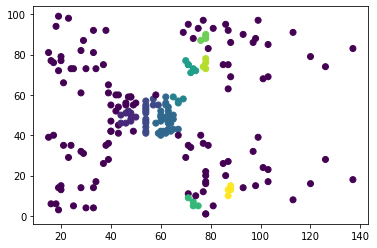

In [19]:
plt.scatter(df.iloc[:,2],df.iloc[:,3],c = model.labels_)